In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from plotnine import ggplot, aesp
from ggplot import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

### Data Understanding

In [71]:
# Reading the Data
df = pd.read_csv("/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/train_data.csv")
df_test = pd.read_csv("/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/test_data_with_inputs.csv")

In [72]:
# Displaying the first 10 records
df.head(10)

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,imdb_score
0,1042,Phillip Noyce,118.0,176.0,308.0,Angelina Jolie Pitt,18000.0,66488090.0,Crime|Drama|Mystery|Thriller,Denzel Washington,...,R,48000000.0,1999.0,11000.0,2.35,0,-18488090.0,-27.806619,0.188917,6.7
1,2501,Daniel Barnz,86.0,33.0,583.0,Mary-Kate Olsen,15000.0,27854896.0,Drama|Fantasy|Romance,Alex Pettyfer,...,PG-13,17000000.0,2011.0,976.0,2.35,16000,-10854896.0,-38.969436,1.147287,5.6
2,1248,Steven Spielberg,155.0,14000.0,11000.0,Morgan Freeman,12000.0,44175394.0,Drama|History,Anthony Hopkins,...,R,36000000.0,1997.0,11000.0,1.85,0,-8175394.0,-18.506669,0.339207,7.2
3,3892,Marc Forster,112.0,395.0,80.0,Peter Boyle,13000.0,31252964.0,Drama|Romance,Heath Ledger,...,R,4000000.0,2001.0,595.0,2.35,0,-27252964.0,-87.201214,0.293103,7.1
4,4315,James Watkins,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,Horror|Thriller,Michael Fassbender,...,R,20000000.0,2008.0,698.0,2.35,0,19994176.0,343306.593407,0.450980,6.8
5,2606,Sam Mendes,122.0,0.0,158.0,Peter Gallagher,18000.0,130058047.0,Drama,Kevin Spacey,...,R,15000000.0,1999.0,828.0,2.35,22000,-115058047.0,-88.466688,0.064825,8.4
6,216,Tony Gilroy,135.0,209.0,602.0,Scott Glenn,10000.0,113165635.0,Action|Adventure|Thriller,Jeremy Renner,...,PG-13,125000000.0,2012.0,826.0,2.35,31000,11834365.0,10.457561,0.865079,6.7
7,4736,Joseph Dorman,93.0,0.0,59.0,Peter Riegert,399.0,906666.0,Documentary,Rachel Dratch,...,Unrated,500000.0,2011.0,169.0,16.00,287,-406666.0,-44.852901,5.800000,6.8
8,748,Todd Phillips,101.0,480.0,767.0,Carmen Electra,881.0,88200225.0,Comedy|Crime,Snoop Dogg,...,PG-13,60000000.0,2004.0,869.0,2.35,0,-28200225.0,-31.972963,0.561688,6.1
9,4263,Sylvain Chomet,80.0,162.0,0.0,Charles Linton,23.0,7002255.0,Animation|Comedy|Drama,Michel Robin,...,PG-13,9500000.0,2003.0,6.0,1.66,0,2497745.0,35.670580,0.535256,7.8


In [73]:
df.columns
listOfCols = df.columns

In [74]:
df.describe()

,s_no,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,imdb_score
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4.225000e+03,4.225000e+03,4225.000000,4225.000000,4.225000e+03,4225.000000,4225.000000,4225.000000,4225.00000,4.225000e+03,4.225000e+03,4225.000000,4225.000000
mean,2453.915740,108.593136,707.537515,655.863905,6817.903195,4.604866e+07,8.841292e+04,10046.912426,1.366154,3.972844e+07,2002.164024,1698.986272,2.126277,7838.04071,-6.320218e+06,6.671254e+03,0.896648,6.427905
std,1436.634285,22.569440,2835.019787,1670.677214,15440.494498,6.440872e+07,1.419197e+05,18620.002492,2.033256,2.126622e+08,12.325422,4152.350628,0.666806,19911.91734,2.157819e+08,1.132255e+05,1.036943,1.105537
min,0.000000,14.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,2.180000e+02,1927.000000,0.000000,1.180000,0.00000,-5.235058e+08,-9.998610e+01,0.037037,1.600000
25%,1211.000000,94.000000,7.000000,141.000000,634.000000,8.070311e+06,1.066700e+04,1495.000000,0.000000,8.000000e+06,1999.000000,294.000000,1.850000,0.00000,-2.420000e+07,-6.202187e+01,0.384298,5.800000
50%,2432.000000,104.000000,51.000000,384.000000,1000.000000,2.600591e+07,3.790100e+04,3218.000000,1.000000,2.000000e+07,2005.000000,613.000000,2.350000,177.00000,-4.203192e+06,-2.007999e+01,0.625000,6.600000
75%,3678.000000,118.000000,209.000000,642.000000,11000.000000,5.454052e+07,1.018990e+05,14421.000000,2.000000,4.000000e+07,2010.000000,925.000000,2.350000,5000.00000,9.810821e+06,1.061175e+02,1.098121,7.200000
max,5042.000000,330.000000,22000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,1.221550e+10,2016.000000,137000.000000,16.000000,349000.00000,1.221330e+10,5.555456e+06,25.000000,9.300000


In [75]:

#df.isna()
# count_nan = df['Integers'].isnull().sum()
numColumns = []
catColumns = []
for col in listOfCols:
    count_nan = df[col].isnull().sum()
    print (count_nan, col, df[col].dtype)
    if df[col].dtype == 'object':
        catColumns.append(col)
    else:
        numColumns.append(col)
    

0 s_no int64
0 director_name object
0 duration float64
0 director_facebook_likes float64
0 actor_3_facebook_likes float64
0 actor_2_name object
0 actor_1_facebook_likes float64
0 gross float64
0 genres object
0 actor_1_name object
0 movie_title object
0 num_voted_users int64
0 cast_total_facebook_likes int64
0 actor_3_name object
0 facenumber_in_poster float64
0 plot_keywords object
2 language object
0 country object
0 content_rating object
0 budget float64
0 title_year float64
0 actor_2_facebook_likes float64
0 aspect_ratio float64
0 movie_facebook_likes int64
0 Profit float64
0 Profit_Percentage float64
0 critic_review_ratio float64
0 imdb_score float64


In [76]:
catColumns

['director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'language',
 'country',
 'content_rating']

In [77]:
# Less variance of values, can drop it
df.shape

(4225, 28)

In [78]:
# Dropping the rows with nan values as there are only 2 rows.
df.dropna()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,imdb_score
0,1042,Phillip Noyce,118.0,176.0,308.0,Angelina Jolie Pitt,18000.0,66488090.0,Crime|Drama|Mystery|Thriller,Denzel Washington,...,R,48000000.0,1999.0,11000.0,2.35,0,-18488090.0,-27.806619,0.188917,6.7
1,2501,Daniel Barnz,86.0,33.0,583.0,Mary-Kate Olsen,15000.0,27854896.0,Drama|Fantasy|Romance,Alex Pettyfer,...,PG-13,17000000.0,2011.0,976.0,2.35,16000,-10854896.0,-38.969436,1.147287,5.6
2,1248,Steven Spielberg,155.0,14000.0,11000.0,Morgan Freeman,12000.0,44175394.0,Drama|History,Anthony Hopkins,...,R,36000000.0,1997.0,11000.0,1.85,0,-8175394.0,-18.506669,0.339207,7.2
3,3892,Marc Forster,112.0,395.0,80.0,Peter Boyle,13000.0,31252964.0,Drama|Romance,Heath Ledger,...,R,4000000.0,2001.0,595.0,2.35,0,-27252964.0,-87.201214,0.293103,7.1
4,4315,James Watkins,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,Horror|Thriller,Michael Fassbender,...,R,20000000.0,2008.0,698.0,2.35,0,19994176.0,343306.593407,0.450980,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,72,Rob Cohen,112.0,357.0,595.0,Brendan Fraser,5000.0,102176165.0,Action|Adventure|Fantasy|Horror|Thriller,Jet Li,...,PG-13,145000000.0,2008.0,3000.0,2.35,0,42823835.0,41.911766,0.526946,5.2
4221,1145,Len Wiseman,102.0,235.0,520.0,Tony Curran,956.0,62318875.0,Action|Adventure|Fantasy|Sci-Fi|Thriller,Sophia Myles,...,R,50000000.0,2006.0,845.0,2.35,0,-12318875.0,-19.767486,0.410359,6.8
4222,2454,Kenneth Branagh,150.0,0.0,401.0,Brian Blessed,597.0,4414535.0,Drama,Julie Christie,...,PG-13,18000000.0,1996.0,591.0,2.20,0,13585465.0,307.743964,0.379464,7.8
4223,67,Pete Docter,96.0,0.0,262.0,Delroy Lindo,1000.0,292979556.0,Adventure|Animation|Comedy|Family,John Ratzenberger,...,PG,175000000.0,2009.0,848.0,1.85,27000,-117979556.0,-40.268870,0.579545,8.3


In [79]:
df.columns

Index(['s_no', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'language', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes', 'Profit', 'Profit_Percentage',
       'critic_review_ratio', 'imdb_score'],
      dtype='object')

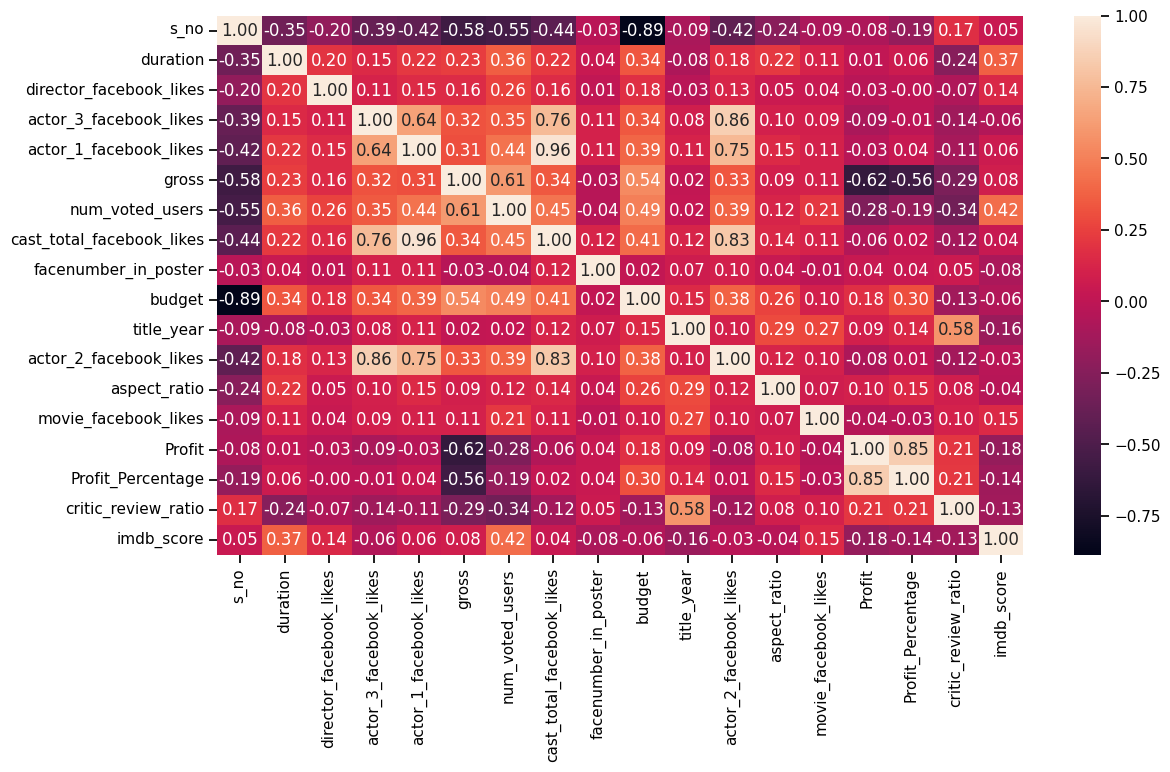

In [80]:
# Correlation with heat map - to find to which feature is similar to which other
# those above 0.5 corr score have significant overlap in information

# calc corr
newDf = df[numColumns]
corr = newDf.corr(method = 'spearman')
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr,annot=True, fmt='.2f')

# # create a mask so we only see the correlation values once
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask, 1)] = True
# a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
# rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
# roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

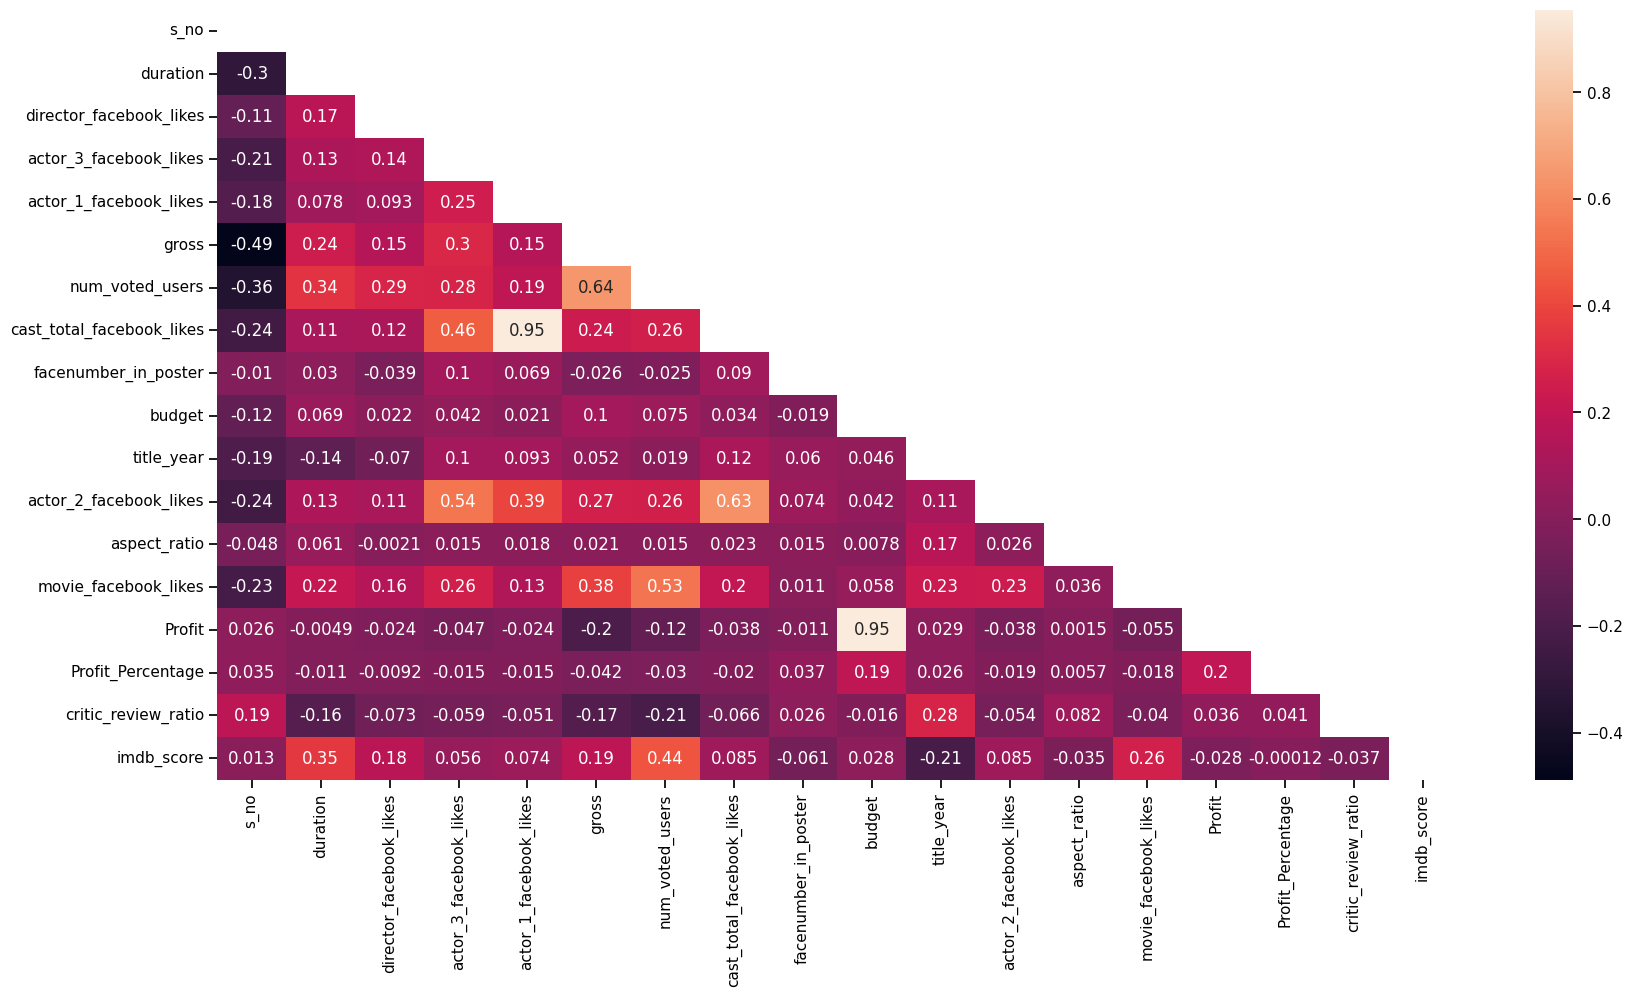

In [81]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(newDf.corr()))
dataplot = sns.heatmap(newDf.corr(), annot=True, mask=mask)

It can be seen that (cast total likes and actor1 facebook likes), (Profit and budget)  are highly correlated. One of each of the pairs can be dropped.

Checking the effect of some features on target variable.

In [82]:
newDf.columns


Index(['s_no', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster', 'budget',
       'title_year', 'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes', 'Profit', 'Profit_Percentage',
       'critic_review_ratio', 'imdb_score'],
      dtype='object')

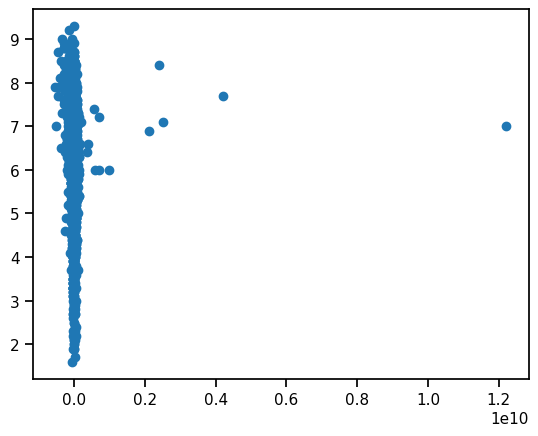

In [83]:
target = df['imdb_score']
newDf = newDf.drop(columns = ['imdb_score'])
plt.scatter(newDf['Profit'], target)

Some values of profit are very large. Hence, we need to scale the data to bring everything in same range so that it becomes easy to work with data. Using Standard Scaler to normalize the data.

In [84]:
newDf.head(5)

,s_no,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio
0,1042,118.0,176.0,308.0,18000.0,66488090.0,120202,29748,2.0,48000000.0,1999.0,11000.0,2.35,0,-18488090.0,-27.806619,0.188917
1,2501,86.0,33.0,583.0,15000.0,27854896.0,64190,17396,1.0,17000000.0,2011.0,976.0,2.35,16000,-10854896.0,-38.969436,1.147287
2,1248,155.0,14000.0,11000.0,12000.0,44175394.0,56509,37570,2.0,36000000.0,1997.0,11000.0,1.85,0,-8175394.0,-18.506669,0.339207
3,3892,112.0,395.0,80.0,13000.0,31252964.0,71495,13707,1.0,4000000.0,2001.0,595.0,2.35,0,-27252964.0,-87.201214,0.293103
4,4315,91.0,43.0,418.0,13000.0,5824.0,57811,14561,1.0,20000000.0,2008.0,698.0,2.35,0,19994176.0,343306.593407,0.450980


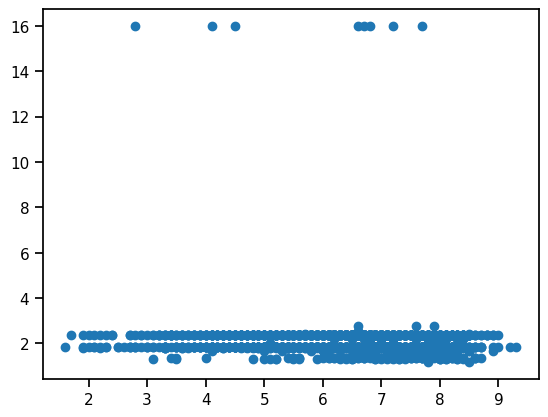

In [85]:
# target = df['imdb_score']
# newDf = newDf.drop(columns = ['imdb_score'])
plt.scatter(target, newDf['aspect_ratio'])

Seeing very less variance in this column's data. this also can be dropped.

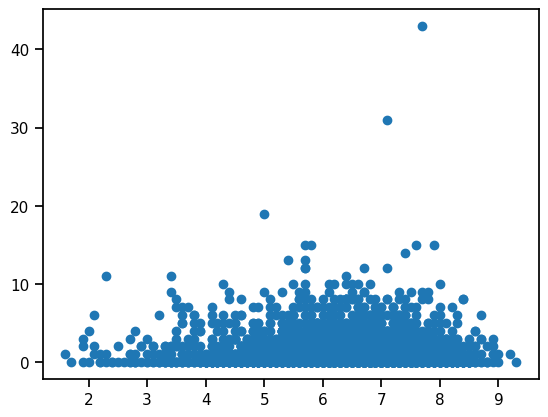

In [86]:
plt.scatter(target, newDf['facenumber_in_poster'])

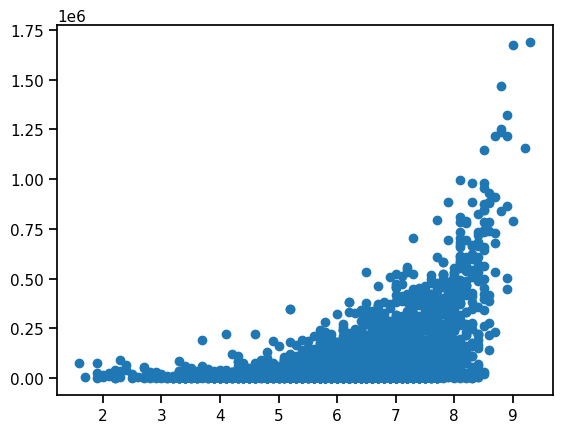

In [87]:
plt.scatter(target, newDf['num_voted_users'])

There is enough variance in both above plots.

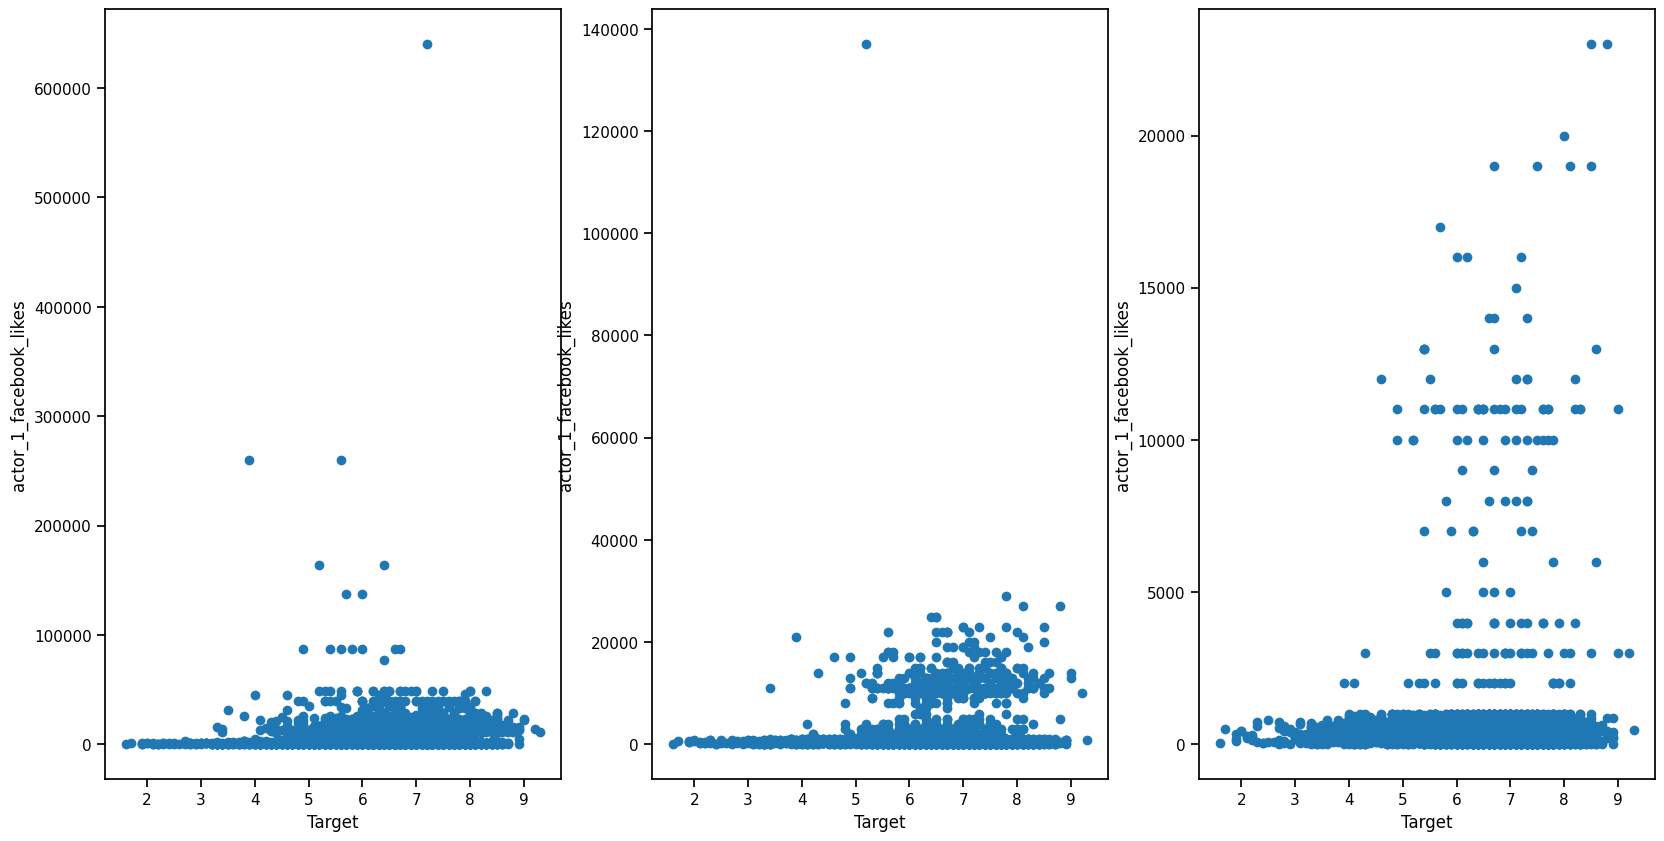

In [88]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.scatter(target, newDf['actor_1_facebook_likes'])
plt.xlabel('Target')
plt.ylabel('actor_1_facebook_likes')
plt.subplot(1, 3, 2)
plt.scatter(target, newDf['actor_2_facebook_likes'])
plt.xlabel('Target')
plt.ylabel('actor_1_facebook_likes')
plt.subplot(1, 3, 3)
plt.scatter(target, newDf['actor_3_facebook_likes'])
plt.xlabel('Target')
plt.ylabel('actor_1_facebook_likes')
plt.show()

> In all out of numerical columns, aspect ratio, cast_total_likes, budget can be dropped.

Encoding the categorical columns.

In [89]:
catColumns

['director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'language',
 'country',
 'content_rating']

In [90]:
newDf.columns

Index(['s_no', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster', 'budget',
       'title_year', 'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes', 'Profit', 'Profit_Percentage',
       'critic_review_ratio'],
      dtype='object')

In [95]:
from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# categories = newDf[['country1']]
# label_encoder.fit(categories)
# newDf['countryLabel'] = label_encoder.transform(categories)
# categories = newDf[['content_rating1']]
# label_encoder.fit(categories)
# newDf['contentRatingLabel'] = label_encoder.transform(categories)
# categories = newDf[['language1']]
# label_encoder.fit(categories)
# newDf['languageLabel'] = label_encoder.transform(categories)


lab = LabelEncoder()

#perform label encoding on 'team' column
newDf['countryLabel']= lab.fit_transform(newDf['country1'])
newDf['contentRatingLabel']= lab.fit_transform(newDf['content_rating1'])
newDf['languageLabel']= lab.fit_transform(newDf['language1'])
newDf['genresLabel']= lab.fit_transform(newDf['BasicGenre'])


# df2 = pd.get_dummies(data = newDf, columns = ['country1','content_rating1','language1'] , prefix = ['country1','content_rating1','language1'] , drop_first = True)
# df2

KeyError: 'country1'

In [ ]:
newDf.head(5)

In [93]:
newDf.drop(columns = ['country1', 'content_rating1', 'language1', 'BasicGenre'], inplace = True)

In [94]:
trans = StandardScaler()
data = trans.fit_transform(newDf)
# convert the array back to a dataframe
newDf = pd.DataFrame(data, columns = [newDf.columns])
newDf.head(5)

,s_no,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio
0,-0.982910,0.416846,-0.187512,-0.208242,0.724292,0.317377,0.224020,1.058186,0.311776,0.038900,-0.256738,2.240205,0.335554,-0.393682,-0.056396,-0.059173,-0.682598
1,0.032778,-1.001168,-0.237959,-0.043619,0.529974,-0.282507,-0.170701,0.394735,-0.180104,-0.106888,0.716975,-0.174136,0.335554,0.409952,-0.021018,-0.059271,0.241738
2,-0.839503,2.056425,4.689222,6.192316,0.335657,-0.029087,-0.224829,1.478321,0.311776,-0.017534,-0.419023,2.240205,-0.414378,-0.393682,-0.008598,-0.059090,-0.537645
3,1.001128,0.150968,-0.110255,-0.344730,0.400429,-0.229743,-0.119222,0.196591,-0.180104,-0.168025,-0.094452,-0.265902,0.335554,-0.393682,-0.097020,-0.059697,-0.582111
4,1.295601,-0.779604,-0.234431,-0.142393,0.400429,-0.714939,-0.215654,0.242461,-0.180104,-0.092780,0.473547,-0.241094,0.335554,-0.393682,0.121963,2.973492,-0.429841




Model using only numerical attributes

In [29]:
newDf.columns

MultiIndex([(                     's_no',),
            (                 'duration',),
            (  'director_facebook_likes',),
            (   'actor_3_facebook_likes',),
            (   'actor_1_facebook_likes',),
            (                    'gross',),
            (          'num_voted_users',),
            ('cast_total_facebook_likes',),
            (     'facenumber_in_poster',),
            (                   'budget',),
            (               'title_year',),
            (   'actor_2_facebook_likes',),
            (             'aspect_ratio',),
            (     'movie_facebook_likes',),
            (                   'Profit',),
            (        'Profit_Percentage',),
            (      'critic_review_ratio',)],
           )

In [30]:
newDf.drop(columns = ['aspect_ratio', 'cast_total_facebook_likes', 'budget' ], inplace = True)

In [31]:
newDf.columns

MultiIndex([(                   's_no',),
            (               'duration',),
            ('director_facebook_likes',),
            ( 'actor_3_facebook_likes',),
            ( 'actor_1_facebook_likes',),
            (                  'gross',),
            (        'num_voted_users',),
            (   'facenumber_in_poster',),
            (             'title_year',),
            ( 'actor_2_facebook_likes',),
            (   'movie_facebook_likes',),
            (                 'Profit',),
            (      'Profit_Percentage',),
            (    'critic_review_ratio',)],
           )

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression
select = SelectKBest(f_regression, k=10)
xnew = select.fit_transform(newDf, target)

In [37]:
from numpy import array 
filter = select.get_support()
features = array(newDf.columns)


In [39]:
top10 = list(features[filter])

# 

In [41]:
len(top10)

10

In [42]:
X_train, X_test, y_train, y_test = train_test_split(xnew, target, test_size=0.2, random_state=100)

In [45]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))

Coefficients: 
 [ 0.22028367  0.02409117 -0.06039884  0.01235137 -0.20021554  0.48961211
 -0.04490972 -0.23288194  0.01108612  0.11494488]
Mean squared error: 0.96


In [46]:
test_data = pd.read_csv('/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/test_data_with_inputs.csv')

In [47]:
test_data.drop(columns = ['aspect_ratio', 'cast_total_facebook_likes', 'budget' ], inplace = True)

In [48]:
test_data.shape

(470, 24)

In [49]:
(newDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (s_no,)                     4225 non-null   float64
 1   (duration,)                 4225 non-null   float64
 2   (director_facebook_likes,)  4225 non-null   float64
 3   (actor_3_facebook_likes,)   4225 non-null   float64
 4   (actor_1_facebook_likes,)   4225 non-null   float64
 5   (gross,)                    4225 non-null   float64
 6   (num_voted_users,)          4225 non-null   float64
 7   (facenumber_in_poster,)     4225 non-null   float64
 8   (title_year,)               4225 non-null   float64
 9   (actor_2_facebook_likes,)   4225 non-null   float64
 10  (movie_facebook_likes,)     4225 non-null   float64
 11  (Profit,)                   4225 non-null   float64
 12  (Profit_Percentage,)        4225 non-null   float64
 13  (critic_review_ratio,)      4225 

In [50]:
numeric_cols = test_data.select_dtypes(include=['int64', 'float64']).columns
(numeric_cols)

Index(['s_no', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'facenumber_in_poster', 'title_year', 'actor_2_facebook_likes',
       'movie_facebook_likes', 'Profit', 'Profit_Percentage',
       'critic_review_ratio'],
      dtype='object')

In [51]:
newTest_data = test_data[numeric_cols]

In [52]:

# dfSub = test_data[['country', 'content_rating', 'language', 'genres']]
# dfSub['country1'] = dfSub.apply(countryNames, axis = 1)
# dfSub['content_rating1'] = dfSub.apply(contentRating, axis = 1)
# dfSub['language1'] = dfSub.apply(langNames, axis = 1)

# dfSub['BasicGenre'] = dfSub.apply(f, axis = 1)
# # test_data.drop(columns = ['aspect_ratio', 'cast_total_facebook_likes', 'budget' ], inplace = True)
# # test_data = pd.concat([test_data, dfSub], axis = 1)
# dfSub.drop(columns = ['country','content_rating','language', 'genres'], inplace = True)

# from sklearn.preprocessing import LabelEncoder

# lab = LabelEncoder()

# #perform label encoding on 'team' column
# dfSub['countryLabel']= lab.fit_transform(dfSub['country1'])
# dfSub['contentRatingLabel']= lab.fit_transform(dfSub['content_rating1'])
# dfSub['languageLabel']= lab.fit_transform(dfSub['language1'])
# dfSub['genreLabel']= lab.fit_transform(dfSub['BasicGenre'])

# dfSub.drop(columns = ['country1', 'content_rating1', 'language1', 'BasicGenre' ], inplace = True)

In [53]:
newTest_data.shape

(470, 14)

In [54]:
# newTest_data = pd.concat([newTest_data, dfSub], axis = 1)

In [55]:
newTest_data.head()

,s_no,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,title_year,actor_2_facebook_likes,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio
0,1469,106.0,309.0,63.0,327.0,28064226.0,65044,1.0,2011.0,73.0,13000,6935774.0,24.713933,1.040462
1,444,97.0,56.0,852.0,12000.0,82506325.0,27838,0.0,2006.0,8000.0,0,-62506325.0,-75.759434,1.176471
2,4871,92.0,337.0,22.0,35.0,45661.0,7148,0.0,2007.0,32.0,773,19954339.0,43701.055605,2.656250
3,877,141.0,16000.0,539.0,11000.0,35707327.0,199056,0.0,2008.0,963.0,14000,19292673.0,54.030012,0.682171
4,4355,89.0,47.0,585.0,628.0,444044.0,744,6.0,2015.0,606.0,1000,1455956.0,327.885525,0.526316


In [56]:
trans = StandardScaler()
data = trans.fit_transform(newTest_data)
# convert the array back to a dataframe
newDf = pd.DataFrame(data, columns = [newTest_data.columns])
newDf.shape

(470, 14)

In [57]:
newtop10 = newDf[top10]

In [58]:
newtop10.shape

(470, 10)

In [59]:
diabetes_y_pred = regr.predict(newtop10)
len(diabetes_y_pred)

470

In [60]:
from sklearn.model_selection import GridSearchCV

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [63]:
# X_train, X_test, y_train, y_test
parameters = {
    "loss":["squared_error"],
    "learning_rate": [0.05,0.1, 0.2],
    "min_samples_split": [40, 50],
    "min_samples_leaf": [20, 30],
    "max_depth":[8],
#     "max_features":["sqrt"],
    "criterion": ["squared_error", ],
    "subsample":[0.618, 0.8, 0.85],
    "n_estimators":[10]
    }

clf = GridSearchCV(ensemble.GradientBoostingRegressor(), parameters, cv=10, n_jobs=-1)

In [64]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

0.5941619979521189
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 10, 'subsample': 0.8}


In [65]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

0.577924441096883
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 40, 'n_estimators': 10, 'subsample': 0.8}


In [50]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly')
regressor.fit(X_train, y_train)


SVR(kernel='poly')

In [66]:
y_pred = clf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.78


In [ ]:
### Experiment with different regression models
### https://scikit-learn.org/stable/supervised_learning.html

In [68]:
y_pred = clf.predict(X_test)

# The coefficients
# print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.70


In [68]:
y_predtest = clf.predict(newtop10)
len(y_predtest)

470

### Evaluation and saving output

In [69]:
# Creating output file for submission - Template Code

# test = pd.read_csv('/kaggle/input/test-imdb/test_data_with_inputs.csv')

# Convert all submission data to same input format as done for train data
# run prediction as y_pred = model.predict(X_test)
# y_pred contains IMDB scores

submission = pd.DataFrame({'s_no':test_data.s_no, 'imdb_score':y_predtest[..., 0]}).set_index('s_no')
submission.to_csv('output_submissionGBR4.csv')